In [1]:
import numpy as np
from utils import generator
from cv2 import imread, imwrite
import matplotlib.pylab as plt

In [2]:
from utils import add_neuron_subdir,add_trial_subdir

In [3]:
from sklearn.decomposition import PCA

In [4]:
from os.path import join
import os

In [109]:
exp_dir = r"D:\Generator_DB_Windows\data\with_CNN"
neuron = ('caffe-net', 'fc8', 1)
this_exp_dir = add_neuron_subdir(neuron, exp_dir)

In [8]:
from glob import glob

In [13]:
trialnamelist = os.listdir(this_exp_dir)

In [110]:
datadict = np.load(join(this_exp_dir, trialnamelist[0], "codes_all.npz"))
print(trialnamelist[0])

choleskycma_sgm3_uf10_cc0.00_cs0.05


In [111]:
codes_all = datadict['codes_all']
generations = datadict['generations']

In [19]:
pca = PCA(n_components=10,copy=True)
PC_codes = pca.fit_transform(codes_all)

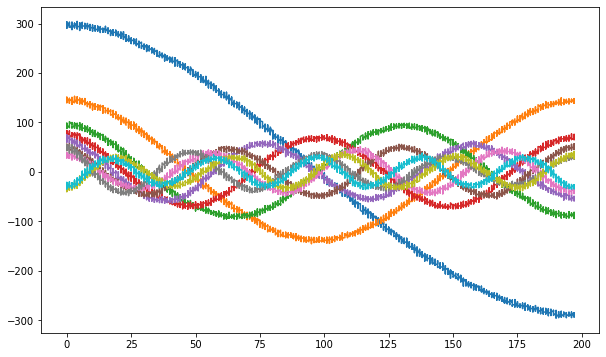

In [27]:
plt.figure(figsize=[10,6])
plt.plot(generations,PC_codes)
plt.show()

In [29]:
codes_all.shape

(7920, 4096)

## Example Analysis of Code

In [5]:
exp_dir = r"D:\Generator_DB_Windows\data\with_CNN"
# this_exp_dir = os.path.join(exp_dir, "purenoise")
this_exp_dir = add_neuron_subdir(('caffe-net', 'fc8', 1), exp_dir, )
# trial_title = 'choleskycma_sgm3_uf10_cc%.2f_cs%.2f' % (0.00097, 0.0499)
trial_title = 'choleskycma_sgm3_uf10_cc%.2f_cs%.2f' % (1/5, 1/3)
trialdir = add_trial_subdir(this_exp_dir, trial_title)

In [6]:
import utils
codes_all, generations = utils.codes_summary(trialdir)

In [7]:
codes_all.shape

(7920, 4096)

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

In [105]:
codes_all.shape

(7920, 4096)

In [107]:
import scipy

In [110]:
scipy.spatial.distance_matrix(codes_all[:10, :], codes_all[6000:6010, :], p=2)

array([[735.63205124, 725.68020551, 736.49722868, 723.53606676,
        719.86603846, 734.38357476, 716.93907895, 730.27596791,
        726.22286552, 722.66963406],
       [733.36108173, 725.2496235 , 735.813357  , 719.57434591,
        720.09940043, 733.05484643, 715.21956416, 729.45150261,
        725.68969215, 720.91511764],
       [736.76050648, 728.39218977, 737.37111165, 723.59448176,
        721.75612624, 737.05424149, 718.90764035, 730.7732724 ,
        728.31937412, 724.75032163],
       [734.02388417, 725.7945165 , 736.03718196, 721.85017489,
        719.83281799, 733.9392894 , 715.67408944, 728.87482189,
        726.29148412, 722.65560076],
       [730.89752026, 723.32260738, 730.99843461, 719.31835792,
        715.91956235, 730.84529266, 712.42398304, 725.96407966,
        721.59716383, 719.09976308],
       [731.37536293, 721.28458022, 732.06711406, 717.98961282,
        715.0910651 , 729.45858203, 711.7446902 , 723.31184697,
        720.9121905 , 718.16914695],
       [72

In [106]:
np.linalg.norm(codes_all[:10, :], axis=1)

array([193.02245283, 193.89946078, 194.24076859, 194.20620537,
       194.50119062, 191.72315742, 192.76411596, 193.8331663 ,
       194.56325702, 191.18944846])

In [101]:
np.sqrt(code_norm[:40])

array([193.02245283, 193.89946078, 194.24076859, 194.20620537,
       194.50119062, 191.72315742, 192.76411596, 193.8331663 ,
       194.56325702, 191.18944846, 196.14449016, 190.47533596,
       189.96915043, 193.35077202, 193.47249437, 191.61219998,
       196.27833971, 191.72094578, 191.82226469, 192.31178309,
       193.69853934, 191.3458243 , 193.30179212, 197.3116422 ,
       194.86617157, 195.86078856, 194.77128462, 195.31493033,
       194.03841285, 194.84769006, 196.83274194, 193.98981242,
       194.20004805, 192.0157375 , 192.02268564, 194.20071937,
       193.46279553, 192.42748077, 196.67666376, 194.53177318])

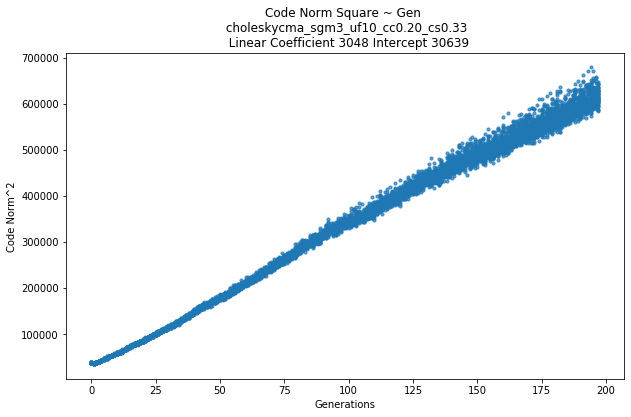

In [98]:
code_norm = np.sum(codes_all**2, axis=1)#np.sqrt()
model = LinearRegression().fit(generations.reshape(-1, 1), code_norm)
plt.figure(figsize=[10,6])
plt.scatter(generations, code_norm,s=10,alpha =0.7)
plt.title("Code Norm Square ~ Gen \n %s\n  Linear Coefficient %.f Intercept %.f"%(trial_title,model.coef_[0], model.intercept_))
plt.ylabel("Code Norm^2")
plt.xlabel("Generations")
plt.savefig("code_norm_evolution.png")
plt.show()

In [10]:
pca = PCA(n_components=50,copy=True)
PC_codes = pca.fit_transform(codes_all)

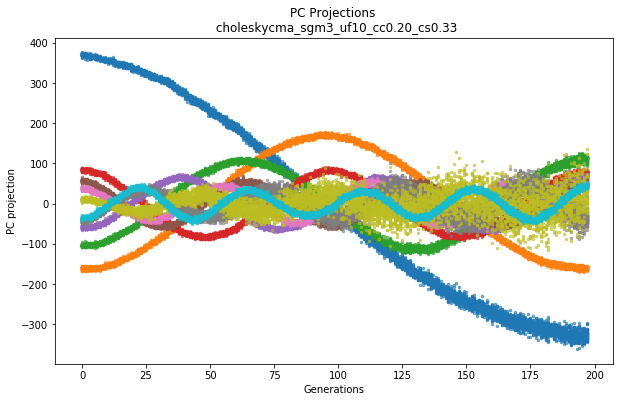

In [11]:
plt.figure(figsize=[10,6])
for i in range(10):
    plt.scatter(generations,PC_codes[:,i],s=6,alpha=0.6)
plt.xlabel("Generations")
plt.ylabel("PC projection")
plt.title("PC Projections \n %s"%(trial_title))
plt.savefig("PC_Proj_evolution.png")
plt.show()

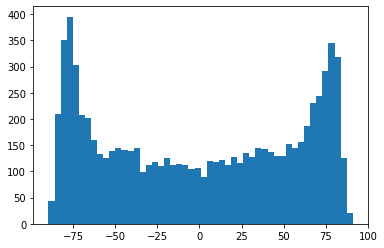

In [38]:
plt.hist(PC_codes[:,3],bins=50)
plt.show()

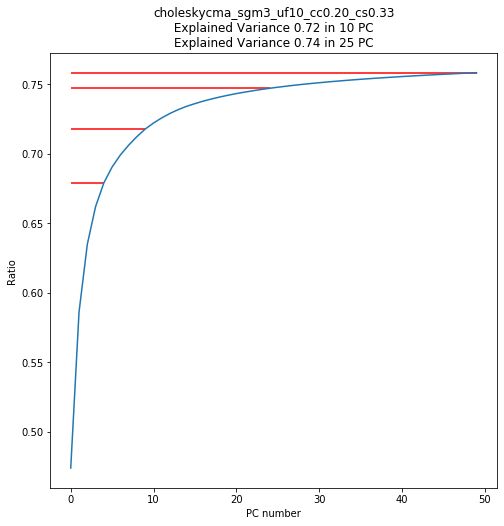

In [12]:
plt.figure(figsize=[8,8])
cumsumvar = np.cumsum(pca.explained_variance_ratio_)
#plt.plot(pca.explained_variance_ratio_)
plt.plot(cumsumvar)
for mark in [5, 10, 25, 50]:
    plt.hlines(cumsumvar[mark-1], 0, mark-1, 'r')
plt.ylabel("Ratio")
plt.xlabel("PC number")
plt.title("%s\n Explained Variance %.2f in 10 PC \nExplained Variance %.2f in 25 PC"%(trial_title, 
                                                                                      sum(pca.explained_variance_ratio_[:10]),
                                                                                      sum(pca.explained_variance_ratio_[:20])))
plt.savefig("exp_variance.png")
plt.show()

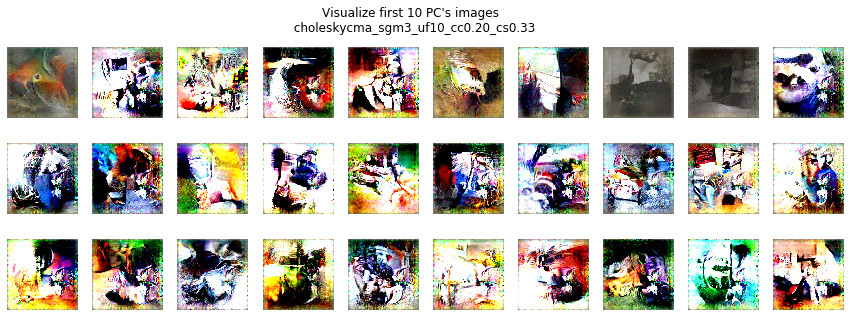

In [16]:
plt.figure(figsize=[15,5])
for i in range(30):
    plt.subplot(3,10,i+1)
    img = generator.visualize(-400*pca.components_[i, :])
    plt.imshow(img.copy())
    plt.axis("off")
plt.suptitle("Visualize first 10 PC's images \n %s"%(trial_title, ))
plt.savefig("PC_visualization.png")
plt.show()

In [40]:
PC_codes.shape

(7920, 50)

In [45]:
(pca.components_**2).sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

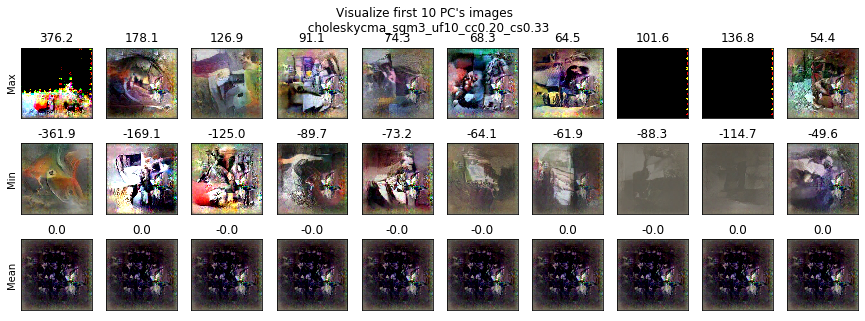

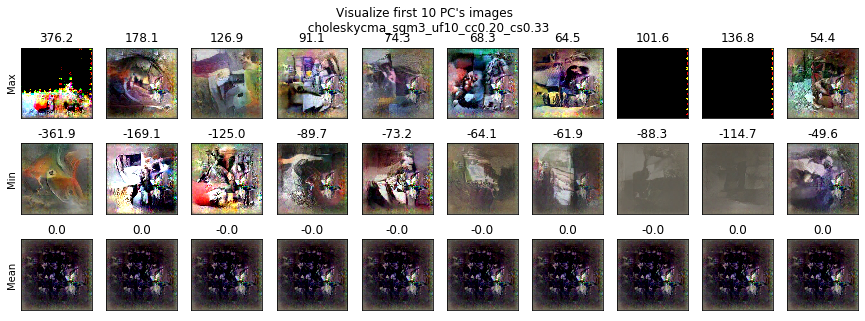

In [87]:
PC_visualization(PC_codes, pca.components_, trial_title=trial_title)
plt.figure(figsize=[15,5])
for i in range(10):
    max_Amp = PC_codes[:, i].max()
    min_Amp = PC_codes[:, i].min()
    mean_Amp = PC_codes[:, i].mean()
    for row, (Amp, name) in enumerate(zip([max_Amp, min_Amp, mean_Amp], ["Max", "Min", "Mean"])):
        img = generator.visualize(Amp*pca.components_[i, :])
        plt.subplot(3,10,i+1 + 10 * row)
        plt.imshow(img)
        plt.title("%.1f" % Amp)
        plt.xticks([])
        plt.yticks([])
        if i == 0:
            plt.ylabel(name)
plt.suptitle("Visualize first 10 PC's images \n %s"%(trial_title, ))
# plt.savefig("PC_visualization.png")
plt.show()

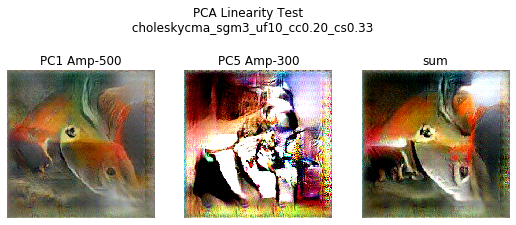

In [65]:
PC_i = 0
Amplitude = 0
plt.figure(figsize=[9,4])
PCi = 0; PCj = 4;
Ampi = -500; Ampj = -300;
code1 = Ampi*pca.components_[PCi, :]
code2 = Ampj*pca.components_[PCj, :]
for i, (name, code) in enumerate(zip(["PC%d Amp%d"%(PCi+1, Ampi), "PC%d Amp%d"%(PCj+1, Ampj), "sum"], 
                                     [code1, code2, code1+code2])):
    plt.subplot(1, 3, i+1)
    img = generator.visualize(code)
    plt.imshow(img)
    plt.axis("off")
    plt.title(name)
plt.suptitle("PCA Linearity Test \n %s"%(trial_title, ))
plt.show()

In [66]:
codes_all.shape

(7920, 4096)

## Cross PCA (Out of sample PCA)

In [137]:
cutting_point = 500
pca1 = PCA(n_components=50,copy=True)
PC_codes_pre = pca1.fit_transform(codes_all[:cutting_point, :])
pca2 = PCA(n_components=50,copy=True)
PC_codes_post = pca2.fit_transform(codes_all[cutting_point:, :])
# PC_codes_pre_post_cross = pca1.transform(codes_all[cutting_point:, :])
PC_codes_pre_all_cross = pca1.transform(codes_all)
PC_codes_post_all_cross = pca2.transform(codes_all)

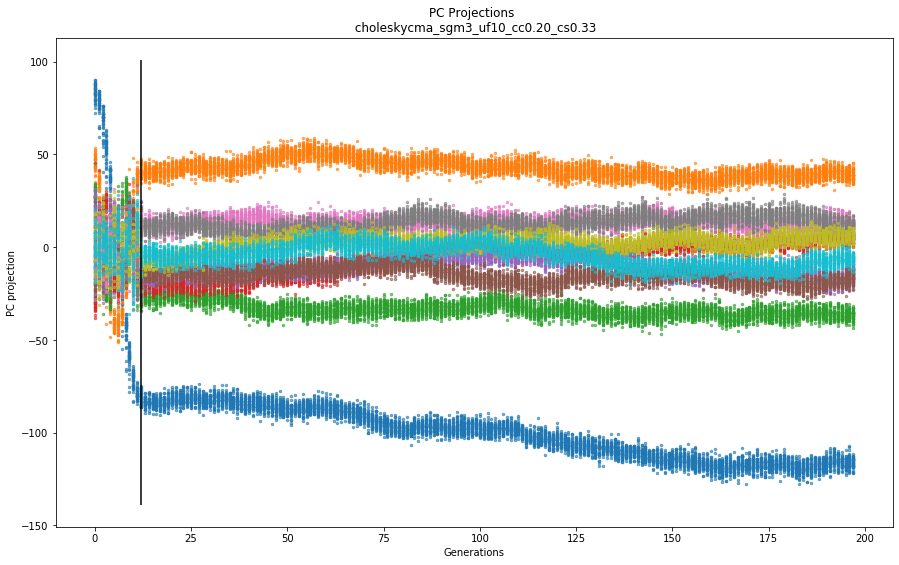

In [138]:
plt.figure(figsize=[15,9])
for i in range(10):
    plt.scatter(generations, PC_codes_pre_all_cross[:,i],s=6,alpha=0.6)
    # plt.scatter(generations[:cutting_point], PC_codes_pre[:,i],s=6,alpha=0.6)
    # plt.scatter(generations[cutting_point:], PC_codes_pre_post_cross[:,i],s=6,alpha=0.6)
plt.vlines(x=generations[cutting_point], ymin=plt.ylim()[0], ymax=plt.ylim()[1])
plt.xlabel("Generations")
plt.ylabel("PC projection")
plt.title("PC Projections \n %s"%(trial_title))
plt.savefig('PC_cross_projection.png', facecolor='w', transparent=False)
plt.show()

In [141]:
pca2.explained_variance_

array([5.32841287e+04, 1.28837060e+04, 5.65413274e+03, 3.09263011e+03,
       1.96513219e+03, 1.30702777e+03, 1.04871998e+03, 8.22214776e+02,
       7.86940585e+02, 6.19130080e+02, 5.04009174e+02, 4.28556981e+02,
       3.68580168e+02, 3.17332723e+02, 2.52348071e+02, 2.34586076e+02,
       1.99102978e+02, 1.83534090e+02, 1.64592899e+02, 1.46703850e+02,
       1.33953669e+02, 1.26212067e+02, 1.15224106e+02, 1.07357317e+02,
       9.48836169e+01, 9.29888465e+01, 8.43950235e+01, 7.79638660e+01,
       7.41447802e+01, 7.12620082e+01, 6.56898367e+01, 6.38402360e+01,
       5.99675434e+01, 5.73674556e+01, 5.46509684e+01, 5.05941803e+01,
       5.03435412e+01, 4.73722912e+01, 4.64693559e+01, 4.51515334e+01,
       4.24377145e+01, 4.16645142e+01, 3.93622304e+01, 3.86804740e+01,
       3.77888904e+01, 3.58134542e+01, 3.53694698e+01, 3.49919818e+01,
       3.35224106e+01, 3.29330378e+01])

In [132]:
pre_cross_trans = pca1.transform(codes_all[cutting_point:, :])

In [142]:
np.var(pca1.transform(codes_all[cutting_point:, :]), axis=0)

array([176.17068552,  23.89692043,  17.06351797,  70.96135168,
        24.77868433,  18.34691715,  10.05709274,  17.61329681,
        16.66741445,  31.58914049,  24.96888175,  16.57031705,
        25.45878162,  17.97443991,  15.81704483,  15.81289126,
        39.04955437,  24.75039953,  19.26440037,  25.09797888,
        18.44925954,  20.60471376,  10.49475199,  15.50793742,
        10.47576388,  37.38657154,  64.95169661,  20.1800653 ,
        18.2335775 ,  14.48644809,  13.09271061,  44.23878551,
        26.15777043,  10.08514815,  15.84789194,  11.36252054,
        23.92091609,  35.10984031,  26.05489696,  31.00610072,
        20.03087657,  17.97445076,  63.47310012,  12.80737545,
        24.28866309,  22.77583649,  28.10681072,  27.35639132,
        51.96332865,  19.65941015])

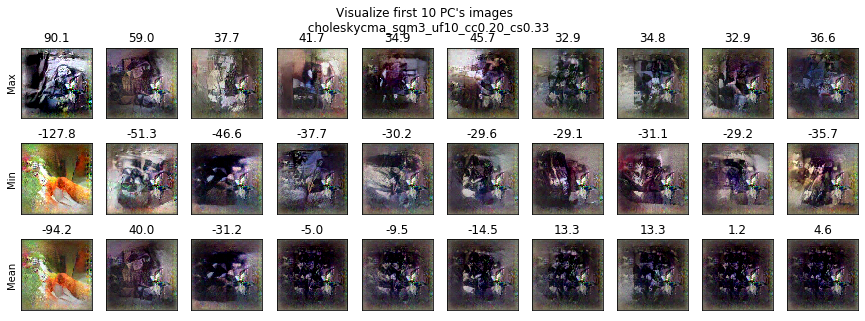

In [86]:
PC_visualization(PC_codes_pre_all_cross, pca1.components_, trial_title=trial_title)

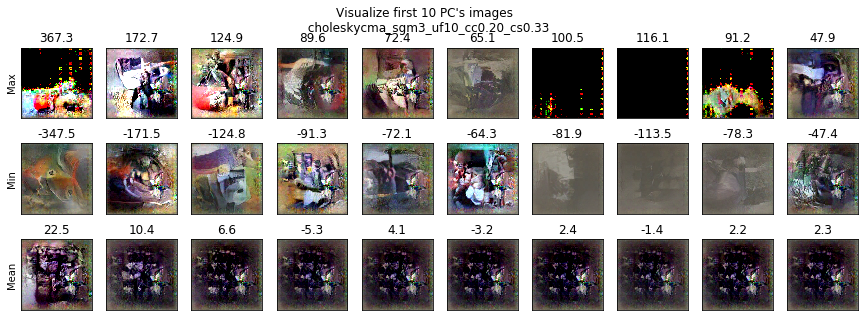

In [143]:
PC_visualization(PC_codes_post_all_cross, pca2.components_, trial_title=trial_title)

In [85]:
def PC_visualization(PC_codes, pc_components, trial_title=""):
    plt.figure(figsize=[15,5])
    for i in range(10):
        max_Amp = PC_codes[:, i].max()
        min_Amp = PC_codes[:, i].min()
        mean_Amp = PC_codes[:, i].mean()
        for row, (Amp, name) in enumerate(zip([max_Amp, min_Amp, mean_Amp], ["Max", "Min", "Mean"])):
            img = generator.visualize(Amp*pc_components[i, :])
            plt.subplot(3,10,i+1 + 10 * row)
            plt.imshow(img)
            plt.title("%.1f" % Amp)
            plt.xticks([])
            plt.yticks([])
            if i == 0:
                plt.ylabel(name)
    plt.suptitle("Visualize first 10 PC's images \n %s"%(trial_title, ))
    plt.show()

In [124]:
img1 = generator.visualize( -step *1 *pca1.components_[0, :])
img2 = generator.visualize( -step *2 *pca1.components_[0, :])

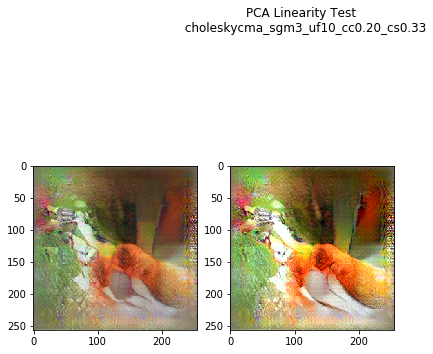

In [125]:

plt.figure(figsize=[10,7])
plt.subplot(1, 3, 1)
plt.imshow(img1)
plt.subplot(1, 3, 2)
plt.imshow(img2)
plt.suptitle("PCA Linearity Test \n %s"%(trial_title, ))
plt.show()

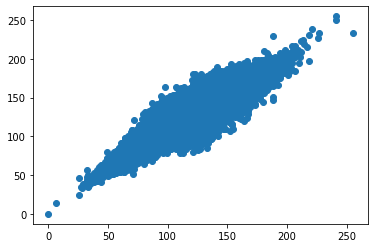

In [118]:
plt.scatter(img1[:], img2[:])
plt.show()

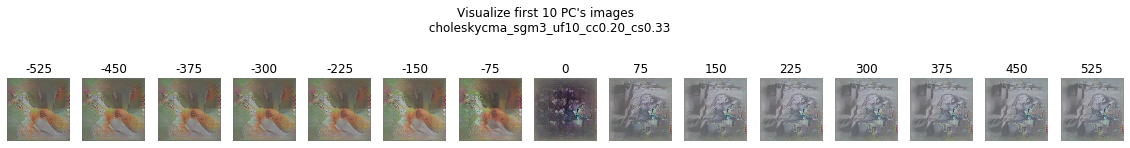

In [116]:
step = 75
plt.figure(figsize=[20,3])
for i in range(15):
    plt.subplot(1,15,i+1)
    img = generator.visualize_norm( step *(i-7) *pca1.components_[0, :])
    plt.imshow(img)
    plt.title("%d" % (step *(i-7)))
    plt.axis("off")
plt.suptitle("Visualize first 10 PC's images \n %s"%(trial_title, ))
plt.show()

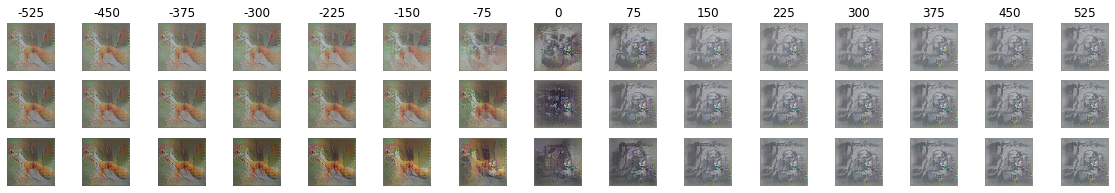

In [126]:
step = 75
plt.figure(figsize=[20,3])
for i in range(15):
    plt.subplot(3,15,i+1)
    img = generator.visualize_norm( step *(i-7) *pca1.components_[0, :] - step * pca1.components_[1, :])
    plt.imshow(img)
    plt.title("%d" % (step *(i-7)))
    plt.axis("off")
    plt.subplot(3,15,15+i+1)
    img = generator.visualize_norm( step *(i-7) *pca1.components_[0, :] +0* step * pca1.components_[1, :])
    plt.imshow(img)
    plt.axis("off")
    plt.subplot(3,15,30+i+1)
    img = generator.visualize_norm( step *(i-7) *pca1.components_[0, :] + step * pca1.components_[1, :])
    plt.imshow(img)
    plt.axis("off")
plt.show()

In [114]:
import net_utils
class Generator:
    '''Load CaffeNet generator

    Major use is to "visualize", detransform the code to the image
    '''
    def __init__(self):
        generator = net_utils.load('generator')
        detransformer = net_utils.get_detransformer(generator)
        self._GNN = generator
        self._detransformer = detransformer

    def visualize(self, code):
        x = self._GNN.forward(feat=code.reshape(1, 4096))['deconv0']
        x = self._detransformer.deprocess('data', x)
        x = np.clip(x, 0, 1)  # use clip to bound all the image output in interval [0,1]
        return (x * 255).astype('uint8')  # rescale to uint in [0,255]

    def visualize_norm(self, code):
        x = self._GNN.forward(feat=code.reshape(1, 4096))['deconv0']
        x = self._detransformer.deprocess('data', x)
        # x = np.clip(x, 0, 1)  # use clip to bound all the image output in interval [0,1]
        x = (x - x.min()) / (x.max() - x.min())
        return (x * 255).astype('uint8')  # rescale to uint in [0,255]

    def raw_output(self, code):
        x = self._GNN.forward(feat=code.reshape(-1, 4096))['deconv0']
        return x

In [115]:
generator = Generator()